In [2]:
!git clone https://github.com/tqth/event-inference.git
%cd event-inference
!pip install -r requirement.txt

import sys
import os
import subprocess

repo_path = subprocess.check_output("pwd", shell=True).decode().strip()
sys.path.append(repo_path)
print(repo_path)

Cloning into 'event-inference'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 114 (delta 54), reused 88 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 1.38 MiB | 17.46 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/kaggle/working/event-inference
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-z2x1d2l6
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-z2x1d2l6
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/tqth/recognize-anything.git to /tmp/pip-req-build-9x4hfdw2
  Running command git clone --filter=blob:none --quiet https://github.com/tqth/recognize-anything.git /tmp/pip-req-build-9x4hfdw2
  Resolved https://github.com/tqth/recognize-anything.git to commit 5

In [3]:
from predict_event import predict_event_and_top_n_images_from_folder
album_path = "/kaggle/input/thesis-cufed/CUFED/images/0_10017016@N03"
event, key_images = predict_event_and_top_n_images_from_folder(album_path, n_key_images= 5)
print("Prediction:", event)
print("Key images:", key_images)

2025-07-13 15:14:21.469985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752419661.767157      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752419661.855116      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 84.7MiB/s]
2025-07-13 15:15:02.719650: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 20, 1024)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 20, 1)     │      1,025 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 20)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax (Softmax)   │ (None, 20)        │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 1024, 20)  │          0 │ softmax[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 20, 1024)  │          0 │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 20, 1024)  │          0 │ input_layer[0][0… │
│                     │                   │            │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1024)      │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │    131,200 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 23)        │      2,967 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 135,192 (528.09 KB)

 Trainable params: 135,192 (528.09 KB)

 Non-trainable params: 0 (0.00 B)

Model weights loaded from: weights/attention_model.h5


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/hub.py:4: FutureWarning: Importing from timm.models.hub is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__

⏬ Downloading RAM weights...
✅ Downloaded RAM weights to weights/ram_swin_large_14m.pth


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

BertLMHeadModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.s

/encoder/layer/0/crossattention/self/query is tied
/encoder/layer/0/crossattention/self/key is tied
/encoder/layer/0/crossattention/self/value is tied
/encoder/layer/0/crossattention/output/dense is tied
/encoder/layer/0/crossattention/output/LayerNorm is tied
/encoder/layer/0/intermediate/dense is tied
/encoder/layer/0/output/dense is tied
/encoder/layer/0/output/LayerNorm is tied
/encoder/layer/1/crossattention/self/query is tied
/encoder/layer/1/crossattention/self/key is tied
/encoder/layer/1/crossattention/self/value is tied
/encoder/layer/1/crossattention/output/dense is tied
/encoder/layer/1/crossattention/output/LayerNorm is tied
/encoder/layer/1/intermediate/dense is tied
/encoder/layer/1/output/dense is tied
/encoder/layer/1/output/LayerNorm is tied
--------------
weights/ram_swin_large_14m.pth
--------------
load checkpoint from weights/ram_swin_large_14m.pth
vit: swin_l


Extracting features for inference: 100%|██████████| 1/1 [01:25<00:00, 85.12s/it]


Feature extracted successfully!
X_input shape (1, 20, 1024)
X_input type float32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: ['Wedding']
Key images: [['4785949094.jpg', '4785955252.jpg', '4785314023.jpg', '4785332751.jpg', '4785346881.jpg']]


In [23]:
import os
import matplotlib.pyplot as plt
from PIL import Image

import json

def get_folder_label(folder_name, mapping_file="/kaggle/input/thesis-cufed/CUFED/event_type.json"):
    """
    Trả về nhãn (label) của thư mục album dựa vào file ánh xạ JSON.

    Args:
        folder_name (str): Tên thư mục album (ví dụ: "1526").
        mapping_file (str): Đường dẫn đến file event_type.json.

    Returns:
        str: Nhãn sự kiện (event label), hoặc "Unknown" nếu không tìm thấy.
    """
    try:
        with open(mapping_file, 'r') as f:
            mapping = json.load(f)
        label = mapping.get(folder_name, "Unknown")
        return label
    except Exception as e:
        print(f"Lỗi khi đọc file ánh xạ: {e}")
        return "Unknown"


def show_key_images(key_images, folder_path, predict_labels, true_labels=None):
    """
    Hiển thị ảnh quan trọng theo dạng lưới, 3 ảnh mỗi hàng, có tiêu đề là dự đoán và nhãn thật.

    Args:
        key_images (List[List[str]]): Danh sách các ảnh quan trọng (batch_size, top_k).
        folder_path (str): Đường dẫn thư mục chứa ảnh.
        predict_labels (List[str], optional): Danh sách nhãn dự đoán cho mỗi album.
        true_labels (List[str], optional): Danh sách nhãn thật cho mỗi album.
    """
    for album_idx, album_images in enumerate(key_images):
        pred = predict_labels[album_idx] if predict_labels else "Unknown"
        true = true_labels[album_idx] if true_labels else "Unknown"
        title = f"Predict: {pred}  |  Label: {true}"
        
        print("Importance Images:")
        num_images = len(album_images)
        num_rows = (num_images + 2) // 3

        fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
        fig.suptitle(title, fontsize=16)

        axes = axes.flatten() if num_rows > 1 else axes

        for i in range(3 * num_rows):
            ax = axes[i]
            if i < num_images:
                img_name = album_images[i]
                img_path = os.path.join(folder_path, img_name)
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    ax.imshow(img)
                    ax.set_title(img_name)
                    ax.axis('off')
                else:
                    ax.set_title(f"Not found: {img_name}")
                    ax.axis('off')
            else:
                ax.axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


Importance Images:


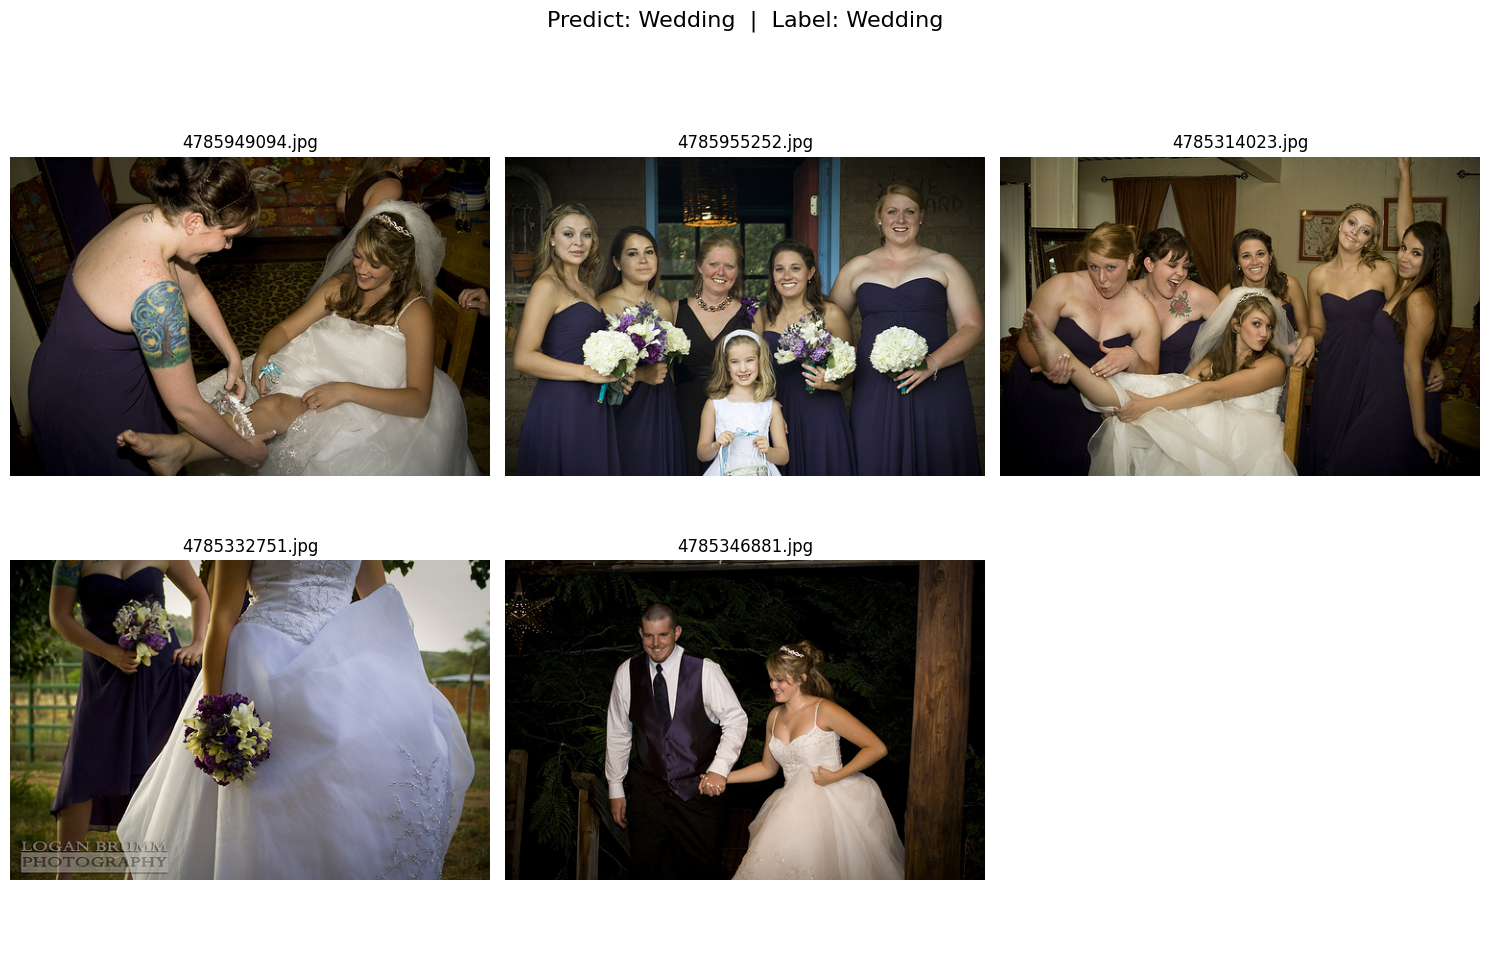

In [24]:
label = get_folder_label(os.path.basename(album_path.rstrip('/')))
show_key_images(key_images, album_path, predict_labels = event, true_labels = label)